In [5]:
import nltk

### First, we will grab a webpage and analyze the text to see what the page is about. urllib module will help us to crawl the webpage

In [21]:
import urllib.request
response =  urllib.request.urlopen('https://en.wikipedia.org/wiki/SpaceX')
html = response.read()
html[:1000]

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>SpaceX - Wikipedia</title>\n<script>document.documentElement.className=document.documentElement.className.replace(/(^|\\s)client-nojs(\\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"SpaceX","wgTitle":"SpaceX","wgCurRevisionId":905389646,"wgRevisionId":905389646,"wgArticleId":832774,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: BOT: original-url status unknown","CS1 maint: Unfit url","Pages with citations lacking titles","Pages with citations having bare URLs","CS1 French-language sources (fr)","Articles with short description","Use American English from November 2015","All Wikipedia articles written in American English","Use mdy dates from November 2015","Coordinates not on Wikidata","Articles containing potentially dated statemen

### We will use Beautiful Soup which is a Python library for pulling data out of HTML and XML files. We will use beautiful soup to clean our webpage text of HTML tags.


In [22]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'html5lib')
text = soup.get_text(strip = True)
text[:1000]

'SpaceX - Wikipediadocument.documentElement.className=document.documentElement.className.replace(/(^|\\s)client-nojs(\\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"SpaceX","wgTitle":"SpaceX","wgCurRevisionId":905389646,"wgRevisionId":905389646,"wgArticleId":832774,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: BOT: original-url status unknown","CS1 maint: Unfit url","Pages with citations lacking titles","Pages with citations having bare URLs","CS1 French-language sources (fr)","Articles with short description","Use American English from November 2015","All Wikipedia articles written in American English","Use mdy dates from November 2015","Coordinates not on Wikidata","Articles containing potentially dated statements from November 2017","All articles containing potentially dated statements",\n"Articles containing potentially dated state

### Now we have clean text from the crawled web page, let’s convert the text into tokens.

In [26]:
tokens = [t for t in text.split()]
tokens[:25]

['SpaceX',
 '-',
 'Wikipediadocument.documentElement.className=document.documentElement.className.replace(/(^|\\s)client-nojs(\\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"SpaceX","wgTitle":"SpaceX","wgCurRevisionId":905389646,"wgRevisionId":905389646,"wgArticleId":832774,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1',
 'maint:',
 'BOT:',
 'original-url',
 'status',
 'unknown","CS1',
 'maint:',
 'Unfit',
 'url","Pages',
 'with',
 'citations',
 'lacking',
 'titles","Pages',
 'with',
 'citations',
 'having',
 'bare',
 'URLs","CS1',
 'French-language',
 'sources',
 '(fr)","Articles',
 'with',
 'short']

### Count word Frequency. nltk offers a function FreqDist() which will do the job for us. Also, we will remove stop words (a, at, the, for etc) from our web page as we don't need them to hamper our word frequency count. We will plot the graph for most frequently occurring words in the webpage in order to get the clear picture of the context of the web page

In [10]:
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt

sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))

SpaceX:163
-:6
Wikipediadocument.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"SpaceX","wgTitle":"SpaceX","wgCurRevisionId":905389646,"wgRevisionId":905389646,"wgArticleId":832774,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1:1
maint::15
BOT::12
original-url:12
status:12
unknown","CS1:1
Unfit:3
url","Pages:1
citations:4
lacking:2
titles","Pages:1
bare:2
URLs","CS1:1
French-language:2
sources:3
(fr)","Articles:1
short:4
description","Use:1
American:6
English:2
November:16
2015","All:1
Wikipedia:4
articles:26
written:2
English","Use:1
mdy:2
dates:2
2015","Coordinates:1
Wikidata","Articles:1
containing:14
potentially:14
dated:14
statements:14
2017","All:1
statements",:1
"Articles:1
March:29
2013","All:1
unsourced:4
statements","Articles:1
September:22
2018",

ISS,:2
possible:1
option:2
transport.[186][187]This:1
"seed:1
money":1
Agreements:1
capabilities,:1
paid:1
$396:1
self-invested:1
vehicle.[188]TheseSpace:1
Agreementshave:1
shown:1
saved:1
millions:1
dollars:1
costs,:1
~4-10:1
cheaper:1
produced:1
alone.[92]In:1
1mission,:1
spacecraft.[189]Dragon:1
deployed:1
circled:1
twice,:1
re-entry:1
burn:1
splashdown:1
Ocean.:1
safe:1
recovery,:1
spacecraft;:1
agencies:1
spacecraft.COTS:1
2launched:1
marking:1
feat.[190][191]Commercial:1
cargo[edit]Main:1
Resupply:3
ServicesCommercial:1
(CRS):1
series:1
2008–2016:1
supplies:1
commercially:2
CRS:3
2008:2
$1.6:1
12:2
deliveries:1
2016.[192]SpaceX:1
CRS-1,:1
20:5
days,:1
beforere-entering:1
atmosphereand:1
splashing:1
Ocean.[193]CRS:1
twice:1
then.:1
ordering:1
SpaceX.[194][195]After:1
extensions:1
missions.[196]A:1
(known:1
CRS2):1
solicited:1
2014.:5
beginning:1
last:2
2024.Commercial:1
crew[edit]Crew:1
undergoing:1
flightMain:1
DevelopmentThe:1
(CCDev):1
ISS.:2
win:1
aSpace:1
Agreementin:1
round:

"mirror:1
finish"".Teslarati.:1
24,2018.^abFoust,:1
2018)."Musk:1
teases:1
redesigned:1
system".SpaceNews.:1
13,2019.^Murphy,:1
Mike:2
2019)."Elon:1
shows:1
massive:1
rocket".MarketWatch.:1
12,2019.^Mosher,:1
Dave:1
2019)."SpaceX's:1
blown:1
damaged:1
repairs:1
weeks".Business:1
23,2019.^Jason:1
Paur:1
Rocket-Testing:1
Facility".:1
2013)."SpaceX:2
Appetite:1
Sites:1
Grows".:1
PAYLOAD:1
USER'S:1
GUIDE"(PDF).:1
original(PDF)on:2
2018.^Chris:1
Bergin:2
2011)."SpaceX::1
tag:1
year".:1
SAOCOM:1
1A:1
nails:1
West:1
Coast:1
11,2019.^Granath,:1
Bob:1
2015)."NASA,:1
Sign:1
Property:1
Agreement:1
Pad".NASA.:1
29,2018.^Tribou,:1
Richard:1
2019)."Battered:1
knocked:1
Canaveral".Orlando:1
18,2019.^"SpaceX:1
#Nasa:1
@Kennedy:1
5:35pm".YouTube.:1
18,2019.^"NASA,:1
Dates:1
Program".blogs.nasa.gov.:1
11,2019.^"Gov.:1
Perry:1
Announces:2
State:1
Incentives:1
Bringing:1
Facility,:1
300:1
Jobs:1
Brownsville:2
Area".:1
Office:1
Governor:1
Rick:1
Perry.:1
(link)^Eric:1
2014)."Texas,:1
announce:1
deal:1
Brow

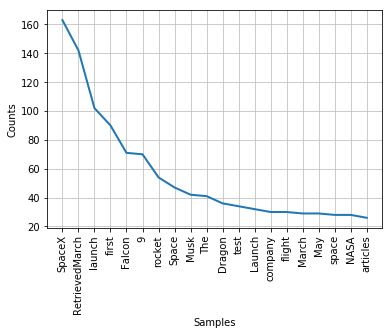

In [9]:
freq.plot(20, cumulative=False)